# Examen Parcial: CC521 A Programación Evolutiva 2022-1
Alumno: Jordi Joel Bardales Rojas

In [129]:
import random
import numpy as np
import copy
import matplotlib.pyplot as plt
 

## 1. Descripción del problema

Tablero fijo inicial del problema 

In [130]:
nums = set(range(1, 10))

sudoku = np.array([[0, 6, 0, 1, 0, 4, 0, 5, 0],
                   [0, 0, 8, 3, 0, 5, 6, 0, 0],
                   [2, 0, 0, 0, 0, 0, 0, 0, 1],
                   [8, 0, 0, 4, 0, 7, 0, 0, 6],
                   [0, 0, 6, 0, 0, 0, 3, 0 ,0],
                   [7, 0, 0, 9, 0, 1, 0, 0, 4],
                   [5, 0, 0 ,0, 0, 0, 0, 0, 2],
                   [0, 0, 7, 2, 0 ,6, 9, 0, 0],
                   [0, 4, 0, 5, 0, 8, 0, 7, 0]])

Elementos faltantes de cada columna con su respectiva posición

In [131]:
def my_sudoku_map(sudoku: np.ndarray):
    ind: list = []
    for i in range(len(sudoku)):
        row = set((sudoku[:, i])[sudoku[:, i] != 0])
        pos = np.where(sudoku[:, i] == 0)[0]
        compl = np.array(list(nums - nums.intersection(row)))
        ind.append([compl, pos])
    return ind

sudoku_map = my_sudoku_map(sudoku)
sudoku_map

[[array([1, 3, 4, 6, 9]), array([0, 1, 4, 7, 8])],
 [array([1, 2, 3, 5, 7, 8, 9]), array([1, 2, 3, 4, 5, 6, 7])],
 [array([1, 2, 3, 4, 5, 9]), array([0, 2, 3, 5, 6, 8])],
 [array([8, 6, 7]), array([2, 4, 6])],
 [array([1, 2, 3, 4, 5, 6, 7, 8, 9]), array([0, 1, 2, 3, 4, 5, 6, 7, 8])],
 [array([9, 2, 3]), array([2, 4, 6])],
 [array([1, 2, 4, 5, 7, 8]), array([0, 2, 3, 5, 6, 8])],
 [array([1, 2, 3, 4, 6, 8, 9]), array([1, 2, 3, 4, 5, 6, 7])],
 [array([3, 5, 7, 8, 9]), array([0, 1, 4, 7, 8])]]

Función que retorna un tablero sudoku dado un individuo

In [132]:
def eval_sudoku(individual: np.ndarray):
    sudoku_temp = np.copy(sudoku)
    for k in range(len(sudoku_temp)):    
        sudoku_temp[(sudoku_map[k][1])[individual[k]], k] = sudoku_map[k][0]
    return sudoku_temp

### 1. Represente en seudcódigo el esquema general del algoritmo genético. [1 punto]

```
poblacion_size = 80
mientras generation_number < max_generation:
    generation_number +=1
    seleccion_padres_por_torneo: selection_size = 60, size = 30
    crossover p=0.8
    mutation p=0.2
    seleccion_del_ambiente_por_torneo:  selection_size = 60, size = 30
```

    
- 

### 2. Describa la representación de los individuos y la población, y elabore su algoritmo. [2 puntos]

Los individuos están representados por una lista de posibles permutaciones de una columna según los elementos restantes:

Ejemplo:

Para la columna 0 del sudoku se tiene los elementos [2, 8, 7, 5], entonces: 
* A = [1, 3, 4, 6, 9] Son los elementos restantes 
* B = [0, 1, 4, 7, 8] Posiciones vacias
* C = [0, 1, 2, 3, 4] Permutación de las posiciones

Con ello en las columnas no hay ningún elemento repetido, pues irán elementos que no se encuentran en la columna fija inicial del sudoku. Además el cruzamiento y mutación solo es una permutación de dichos elementos restantes.

individuo[0] = [0, 1, 2, 3, 4]

Lo mismo para las demas columnas del sudoku 0-8. No necesariamente todas tiene el mismo tamaño pues hay columnas con más elementos vacios que otras.

individuo = [[0, 1, 2, 3, 4], [0, 1], [0, 1, 2], ..., [0, 1, 2, .., 7]]

len(individuo) = 9

In [133]:
def my_individual(sudoku: np.ndarray):
    ind: list = []
    for k in range(len(sudoku)):
        index = list(range(len((sudoku[:, k])[sudoku[:, k] == 0])))
        random.shuffle(index)
        ind.append(np.array(index))
    return ind

print("Gen del individuo")
individual = my_individual(sudoku)
for row in individual: 
    print(row)
print("\nTablero llenado")
eval_sudoku(individual)

Gen del individuo
[0 3 4 2 1]
[6 0 1 4 2 3 5]
[5 0 1 3 2 4]
[1 0 2]
[2 4 1 3 0 6 5 7 8]
[2 1 0]
[4 5 2 3 1 0]
[4 3 6 0 1 5 2]
[4 2 3 1 0]

Tablero llenado


array([[1, 6, 2, 1, 5, 4, 8, 5, 9],
       [9, 2, 8, 3, 3, 5, 6, 4, 8],
       [2, 3, 3, 6, 1, 3, 7, 6, 1],
       [8, 7, 5, 4, 4, 7, 4, 9, 6],
       [6, 8, 6, 8, 2, 2, 3, 2, 5],
       [7, 5, 4, 9, 7, 1, 5, 1, 4],
       [5, 9, 9, 7, 6, 9, 1, 8, 2],
       [3, 1, 7, 2, 8, 6, 9, 3, 7],
       [4, 4, 1, 5, 9, 8, 2, 7, 3]])

### 3. Elabore y explique su algoritmo para la generación de la población inicial. [2 puntos]


Un individuo aleatorio es una permutación aleatoria de cada columna, la población consiste de 80 individuos aleatorios.

In [134]:
POPULATION_SIZE = 80
initial_population = [my_individual(sudoku) for _ in range(POPULATION_SIZE)]
for i, ind in enumerate(initial_population):
    if i%10 == 0: 
        print(f"Individuo {i}\n{eval_sudoku(ind)}")

Individuo 0
[[1 6 5 1 3 4 5 5 7]
 [6 7 8 3 1 5 6 2 8]
 [2 3 9 8 5 2 1 1 1]
 [8 5 3 4 4 7 4 8 6]
 [4 8 6 7 6 9 3 4 3]
 [7 1 4 9 7 1 7 3 4]
 [5 2 1 6 8 3 2 9 2]
 [3 9 7 2 2 6 9 6 9]
 [9 4 2 5 9 8 8 7 5]]
Individuo 10
[[4 6 3 1 3 4 7 5 3]
 [9 9 8 3 7 5 6 4 7]
 [2 5 9 6 5 2 4 3 1]
 [8 8 4 4 4 7 2 1 6]
 [3 2 6 8 6 9 3 2 9]
 [7 7 2 9 2 1 8 8 4]
 [5 3 1 7 1 3 5 9 2]
 [6 1 7 2 9 6 9 6 8]
 [1 4 5 5 8 8 1 7 5]]
Individuo 20
[[3 6 4 1 1 4 4 5 3]
 [4 8 8 3 4 5 6 6 5]
 [2 1 9 7 9 3 1 3 1]
 [8 2 3 4 3 7 5 9 6]
 [6 5 6 8 6 9 3 8 8]
 [7 3 1 9 7 1 2 1 4]
 [5 7 5 6 2 2 8 2 2]
 [9 9 7 2 5 6 9 4 9]
 [1 4 2 5 8 8 7 7 7]]
Individuo 30
[[6 6 5 1 7 4 7 5 7]
 [4 5 8 3 9 5 6 2 5]
 [2 2 2 6 2 2 8 9 1]
 [8 7 3 4 3 7 1 3 6]
 [3 3 6 8 4 9 3 8 9]
 [7 1 4 9 5 1 4 4 4]
 [5 9 1 7 1 3 5 1 2]
 [9 8 7 2 6 6 9 6 3]
 [1 4 9 5 8 8 2 7 8]]
Individuo 40
[[6 6 2 1 4 4 8 5 7]
 [3 1 8 3 6 5 6 6 8]
 [2 9 5 7 1 3 5 4 1]
 [8 3 3 4 5 7 2 2 6]
 [4 7 6 8 3 2 3 3 9]
 [7 8 9 9 9 1 1 8 4]
 [5 5 4 6 8 9 7 1 2]
 [1 2 7 2 2 6 9 9 3]
 [9 4 1 

In [135]:
valor_max = 1*2*3*4*5*6*7*8*9
valor_max

362880

### 4. Defina y explique la función de adaptación (fitness), y elabore su algoritmo de evaluación. [2 puntos]
Multiplicamos los elementos de la filas y las cuadriculas de $3\times3$, luego restamos ambas. Hacemos esto para cada cuadrícula y fila. El valor óptimo es cuando este resultado es $0 (362880 - 362880 = 0)$ pues en teoria deben tener elementos únicos cuya multiplicacion es $1\times2\times3...\times9=362880$. La columna siempre multiplicará $362880$ porque es una permutación con elementos únicos de todos los valores posibles $[1, 2, ..., 9]$.

In [136]:
def fitness(individual: list):
    sudoku_temp = eval_sudoku(individual)
    prod_crudricula = 1
    sub_cruad_row = 0
    for i in range(3):
        for j in range(3):
            sum_crudricula = sudoku_temp[3*i:3*(i + 1), 3*j:3*(j + 1)].prod()
        prod_filas = sudoku_temp[i, :].prod()
        sub_cruad_row += abs(sum_crudricula - prod_filas)
    return sub_cruad_row


### 5. Elabore y explique su algoritmo para el operador de Cruzamiento. [2 puntos]
Se está utilizan un crossover con 3 cortes de manera aleatorio en los genes fijados, en general se puede utilizar hasta 8 cortes. 

Ejemplo:

p1 = [[3 0 1 2 4], [3 2 0 5 6 4 1],|corte [0 5 4 2 1 3],[0 1 2],|corte[0 1 2 7 6 5 4 8 3],[0 1 2],[5 0 3 4 2 1],|corte[0 6 1 2 4 5 3],[3 4 0 2 1]]

p2 = [[4 1 2 3 0], [2 3 0 5 1 4 6],|corte [3 1 2 4 5 0],[2 1 0],|corte[1 2 7 0 5 6 3 8 4],[0 2 1],[3 0 5 4 1 2],|corte[6 0 4 2 1 5 3],[4 3 1 2 0]]

Hijos resultado del cruzamiento

c1 = [[3 0 1 2 4], [3 2 0 5 6 4 1], [3 1 2 4 5 0],[2 1 0], [0 1 2 7 6 5 4 8 3],[0 1 2],[5 0 3 4 2 1], [6 0 4 2 1 5 3],[4 3 1 2 0]]

c2 = [[4 1 2 3 0], [2 3 0 5 1 4 6], [0 5 4 2 1 3],[0 1 2], [1 2 7 0 5 6 3 8 4],[0 2 1],[3 0 5 4 1 2], [0 6 1 2 4 5 3],[3 4 0 2 1]]


In [137]:
def my_crossover(p1: list, p2: list) -> list:
    if random.random() < 0.8:
        c1 = copy.deepcopy(p1)
        c2 = copy.deepcopy(p2)
        ps = random.sample(range(1, 8), 3)
        ps.append(0)
        ps.append(9)
        ps = sorted(ps)
        for i in range(len(ps) - 1):
            if i % 2 == 0:
                continue
            c1[ps[i]:ps[i + 1]], c2[ps[i]:ps[i + 1]] = c2[ps[i]:ps[i + 1]], c1[ps[i]:ps[i + 1]]
        return c1, c2
    return None


### 6. Elabore y explique su algoritmo para el operador de Mutación. [2 puntos]


La mutación es simplemente generar permutar cada columna del individuo.

shuffle(columna_i) para todo i en [0, 1, ..., 8] del individuo

In [138]:
def my_mutation(p1: list) -> np.ndarray:
    if random.random() < 0.2:
        child = copy.deepcopy(p1)
        for i in range(len(child)):
            random.shuffle(child[i])
        return child
    return None


### 7. Elabore y explique su algoritmo para la el método de selección de la siguiente generación. [2 puntos]

Se está utilizando la selección por torneo, el cual se eligen `tournament_size` individuos de manera aleatoria y se selecciona el menor de ellos. El valor óptimo es cero.

In [139]:
def tournament_selection(num_individuals: int, tournament_size: int, population: list, fitness: list):
    pop_fit_zipped = list(zip(population, fitness))
    selected: list = []
    for _ in range(num_individuals):
        candidates = random.choices(pop_fit_zipped, k=tournament_size)
        selected.append(min(candidates, key=lambda pop_fit: pop_fit[1])[0])
    return selected


### 8. Programe el algoritmo genético haciendo uso de la plataforma de Google Colab. [5 puntos]

Generación: 1200, número de descendientes: 61
Generación: 2400, número de descendientes: 59
Generación: 3600, número de descendientes: 55
Generación: 4800, número de descendientes: 66
Generación: 6000, número de descendientes: 55
Generación: 7200, número de descendientes: 58
Generación: 8400, número de descendientes: 63
Generación: 9600, número de descendientes: 68
Generación: 10800, número de descendientes: 57
Generación: 12000, número de descendientes: 57


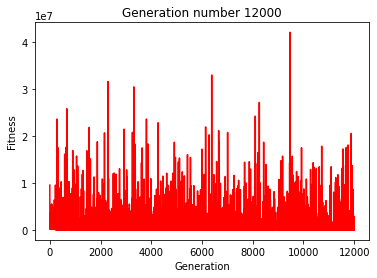

In [140]:
max_generation = 12000
num_individuals = 60
tournament_size = 10

best: list = []
generation_number = 0
population = copy.deepcopy(initial_population)
while generation_number < max_generation:
    generation_number += 1
    # evaluacion de la aptitud de la población inicial (n individuos)
    population_fitness = [fitness(ind) for ind in population]
    # seleccion de los padres (para la reproducción)
    parents = tournament_selection(num_individuals, 30, population, population_fitness)
    # operadores de variación
    offspring: list = []
    # crossover
    for p1, p2 in zip(parents[0::2], parents[1::2]):
        ind = my_crossover(p1, p2)
        if ind != None:
            offspring += ind
    # mutation
    for ind in parents:
        ind = my_mutation(ind)
        if ind != None:
            offspring.append(ind)
    # evaluacion de la aptitud de los λ descendientes
    offspring_fitness = [fitness(ind) for ind in offspring]

    prev_fitness = copy.deepcopy(population_fitness)
    # λ individuos aptos + n padres
    population += offspring
    population_fitness += offspring_fitness
    # seleccionamos un individuo para la grafica
    best.append(population[random.randint(0, len(population) - 1)])
    # selección del ambiente n
    population = tournament_selection(num_individuals, 30, population, population_fitness)

    # impresión de la generación
    if generation_number % int(max_generation / 10) == 0:
        print(f"Generación: {generation_number}, número de descendientes: {len(offspring)}")

plt.plot([fitness(x) for x in best], "r-")
plt.title(f"Generation number {generation_number}")
plt.ylabel("Fitness")
plt.xlabel("Generation")
plt.show()


In [141]:
solution = min(best, key=lambda x: fitness(x))

sudoku_temp = eval_sudoku(solution)

print(f"Optimal value with Tournament Selection\n {sudoku_temp}\nf(x*) = {fitness(solution)}")

Optimal value with Tournament Selection
 [[4 6 5 1 9 4 7 5 8]
 [6 9 8 3 1 5 6 6 5]
 [2 5 2 8 2 9 8 3 1]
 [8 8 1 4 6 7 4 8 6]
 [3 2 6 7 8 2 3 4 7]
 [7 7 9 9 7 1 2 9 4]
 [5 1 4 6 5 3 5 2 2]
 [1 3 7 2 3 6 9 1 3]
 [9 4 3 5 4 8 1 7 9]]
f(x*) = 40284


## Pregunta sobre el teorema del esquema [2 puntos]
Calcular la ecuación y el valor estimado de los representantes del esquema $H$ que sean seleccionados.


Generacion = $\tau$

$N = 100$

$K = m(H, \tau) = 45$

$O(H)=5\quad H=[*, 1, 0, 1, *, *, 1, *, 0]$

$\bar{f}=\frac{\sum_{j=1}^{N}{f_j}}{N} = 75$

$\bar{f}(H)=\frac{\sum_{j=1}^{K}{\hat f_j}}{m(H, \tau)}=70$

$P_c= 0.6$

$P_m= 0.02$

$P_r= 0.3$

$P_i = \frac{f_i}{\sum_{j=1}^{N}{f_j}}$

In [1]:
N = 100
K = 45
OH = 5
mean_f = 75
mean_fH = 70
Pc = 0.6
Pm = 0.02
Pr = 0.3


In [2]:
P_H = mean_fH*K/(mean_f*N)
P_H

0.42

### Probabilidad de seleccionar un representante del esquema $H$



$P_H=\frac{\sum_{i=1}^{K}{\hat{f}_i}}{\sum_{j=1}^{N}{f_j}}=\frac{\overline{f}(H)\times m(H, \tau)}{\overline{f}\times N} = \frac{70\times 45}{75\times 100}=0.42$

###Valor estimado de los representantes del esquema H:


#### 1. Valor estimado de que los representates sean seleccionados y pasen intacto:


In [144]:
(1 - Pc)*K*mean_fH/mean_f

16.8

$$\left(1-P_{c}\right) m(H, \tau) \frac{\bar{f}(H)}{\bar{f}} = 16.8$$

#### 2. El valor esperado de las cadenas seleccionadas para la recombinación que aún se mantienen en el esquema $H$   es


In [145]:
Pc*(K*mean_fH/mean_f*(1 - Pr))

17.639999999999997

$$P_{c}\left[m(H, \tau) \frac{\bar{f}(H)}{\bar{f}}\left(1-P_{r}\right)\right]=17.64$$

#### 3. Añadiendo proceso mutación

In [146]:
(1 - Pm)**OH

0.9039207967999999

Por lo tanto la ecuación del esquema $H$ después de la selección y cruzamiento es:
$$m(H, \tau + 1) \ge (16.8 + 17.64)*0.90392 = 31.131$$

Tambien se puede obtener de la siguiente manera

In [147]:
K*mean_fH/mean_f*(1 - Pr*Pc)*(1 - Pm)**OH

31.131032241792003

$$m(H, \tau +1)\ge m(H, \tau) \frac{\bar{f}(H)}{\bar{f}}\left(1-P_{r}P_{c}\right){(1 - P_m)}^{O(H)}=31.131$$